# Working with track

We provide `SimpleTrack`, an extension of `Curve` object, allows to handle the tracks in both 3D and 2D. Note that the `SimpleTrack` only works for track with no division and merge. It can be used to manipulate for examples nuclear, bacterial, parasites or animal trajectories. This notebook illustrates how to use `SimpleTrack` to handle a 2D trajectory.

The function below generates track coordinates and time. The frame gap is 1 second except one case with 5 seconds. In addition, there are frames that the object does not move.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

def simulate_track_coors():
    """Generate a track coordinates and time
    """

    y_lst, x_lst, t_lst = [], [], []

    # haft of circle
    y = np.linspace(-1,1,15)
    x = np.sqrt(1-y**2)
    t = np.arange(15)
    y_lst += list(y)
    x_lst += list(x)
    t_lst += list(t)

    # another haft of circle
    y = np.linspace(-1,1,15)
    x = -np.sqrt(1-y**2) - 1
    y += 2
    t = np.arange(20,35)
    y_lst += list(y)
    x_lst += list(x)
    t_lst += list(t)

    # immobile portion
    y = np.ones(15) * y_lst[-1]
    x = np.ones(15) * x_lst[-1]
    t = np.arange(36,51)
    y_lst += list(y)
    x_lst += list(x)
    t_lst += list(t)

    coors = np.array([x_lst,y_lst]).T
    
    return coors, t_lst

Now, create a `SimpleTrack` object from the generated coordinates and time.

<IPython.core.display.Javascript object>


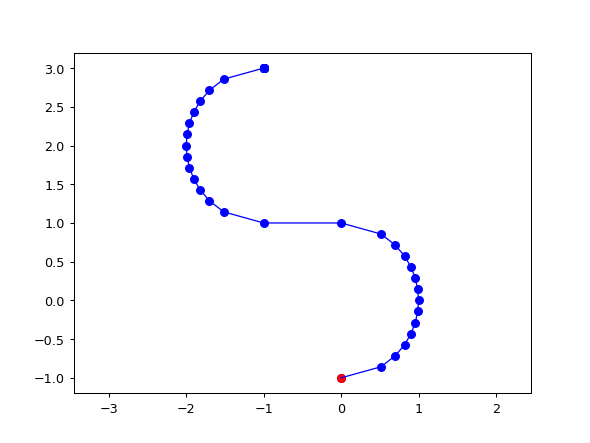

In [2]:
from genepy3d.objext import simpletracks

coors, t = simulate_track_coors()
track = simpletracks.SimpleTrack(coors,t)

fig = plt.figure()
ax = fig.add_subplot(111)
track.plot(ax,projection='xy',point_args={'c':'b'})
ax.axis('equal');

The track starts from the bottom toward the top. We can split the track by specifying the frame gap.

Number of tracks splitted: 2


<IPython.core.display.Javascript object>


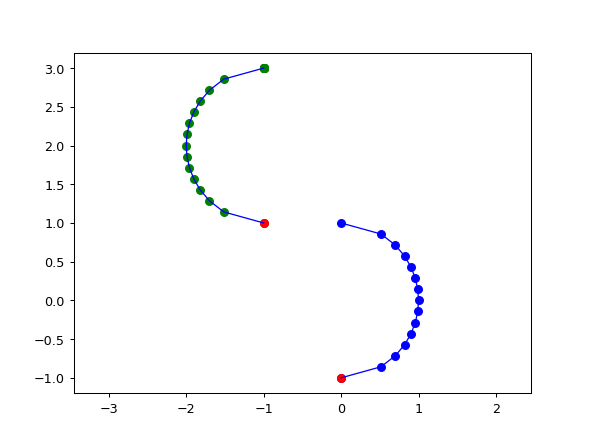

In [3]:
subtracks = track.split(max_gap=4)
print("Number of tracks splitted:",len(subtracks))

fig = plt.figure()
ax = fig.add_subplot(111)
subtracks[0].plot(ax,projection='xy',point_args={'c':'b'})
subtracks[1].plot(ax,projection='xy',point_args={'c':'g'})
ax.axis('equal');

Then, compute the velocity for each subtrack.

<IPython.core.display.Javascript object>


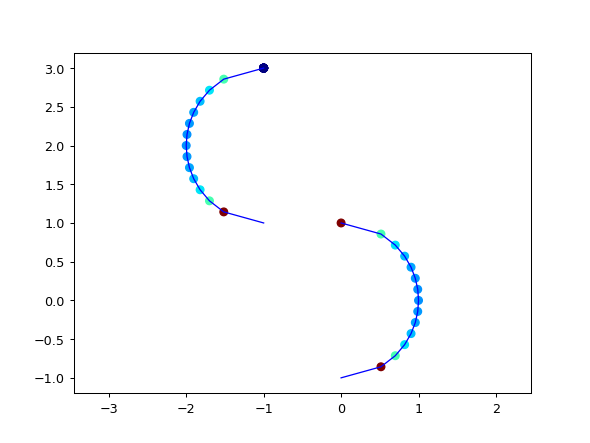

In [4]:
velocity_lst = []
for subtrack in subtracks:
    velocity_lst.append(subtrack.compute_velocity())
    
# compute min and max velocity of the two subtracks
# use this to adjust the velocity display on the track
vmin = min([np.nanmin(item) for item in velocity_lst])
vmax = max([np.nanmax(item) for item in velocity_lst])

fig = plt.figure()
ax = fig.add_subplot(111)
subtracks[0].plot(ax,projection='xy',point_args={'c':velocity_lst[0],'cmap':'jet','vmin':vmin,'vmax':vmax},show_root=None)
subtracks[1].plot(ax,projection='xy',point_args={'c':velocity_lst[1],'cmap':'jet','vmin':vmin,'vmax':vmax},show_root=None)
ax.axis('equal');

We can also merge the tracks.

<IPython.core.display.Javascript object>


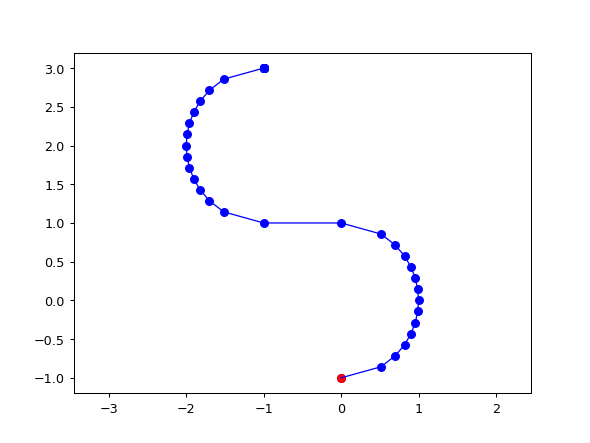

In [5]:
track_merged = simpletracks.merge([subtracks[0],subtracks[1]])
fig = plt.figure()
ax = fig.add_subplot(111)
track_merged.plot(ax,projection='xy',point_args={'c':'b'})
ax.axis('equal');

We provide function to estimate if the object is moving at a given frame.

<IPython.core.display.Javascript object>


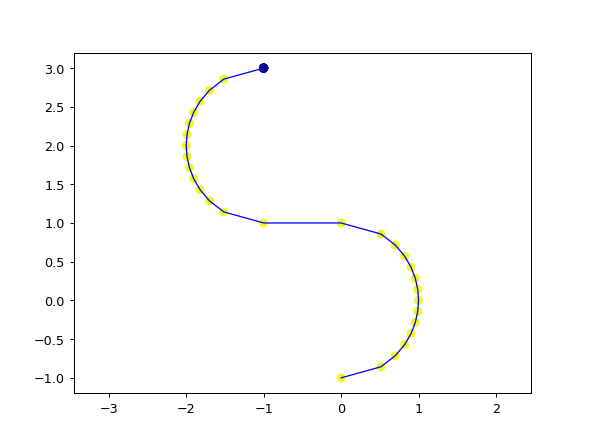

In [6]:
moving_flag = track_merged.is_moving(num_neighbor=3,displ_tol=0.1)

fig = plt.figure()
ax = fig.add_subplot(111)
track_merged.plot(ax,projection='xy',point_args={'c':moving_flag,'cmap':'plasma'},show_root=False)
ax.axis('equal');

So the object stops at the last frames. Note that `SimpleTrack` is inherited from `Curve`, most of the `Curve` function can be used in `SimpleTrack`.

Track length: 7.251279614904545
Track tortuosity: 1.7586936337140937


<IPython.core.display.Javascript object>


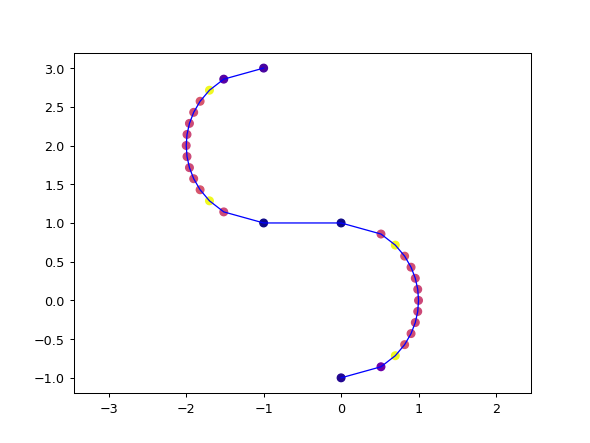

In [7]:
print("Track length:",track_merged.compute_length())
print("Track tortuosity:",track_merged.compute_tortuosity())

# Track curvature
kappa = track_merged.compute_curvature()

fig = plt.figure()
ax = fig.add_subplot(111)
track_merged.plot(ax,projection='xy',point_args={'c':kappa,'cmap':'plasma'},show_root=False)
ax.axis('equal');